In [35]:
import warnings
warnings.filterwarnings("ignore")

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [37]:
df=pd.read_csv("Desktop/House_Price_Prediction/data.csv")

In [38]:
df.head()

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    street       city  statezip country  
0          2005      18810 Densmore Ave N  Shoreline  WA 98133     USA  
1             0           709 W Blaine St    Seattle  WA 98119     USA  
2             0  26206-26214 143rd Ave SE       Kent  WA 98042     USA  
3             0           857 170th Pl NE   Bellevue  WA 98008     USA  
4          1992         9105 170th Ave NE    Redmond  WA 98052     USA

In [39]:
df.tail()

date          price  bedrooms  bathrooms  sqft_living  \
4595  2014-07-09 00:00:00  308166.666667       3.0       1.75         1510   
4596  2014-07-09 00:00:00  534333.333333       3.0       2.50         1460   
4597  2014-07-09 00:00:00  416904.166667       3.0       2.50         3010   
4598  2014-07-10 00:00:00  203400.000000       4.0       2.00         2090   
4599  2014-07-10 00:00:00  220600.000000       3.0       2.50         1490   

      sqft_lot  floors  waterfront  view  condition  sqft_above  \
4595      6360     1.0           0     0          4        1510   
4596      7573     2.0           0     0          3        1460   
4597      7014     2.0           0     0          3        3010   
4598      6630     1.0           0     0          3        1070   
4599      8102     2.0           0     0          4        1490   

      sqft_basement  yr_built  yr_renovated             street       city  \
4595              0      1954          1979     501 N 143rd St    Seattle   
4596              0      1983          2009   14855 SE 10th Pl   Bellevue   
4597              0      2009             0   759 Ilwaco Pl NE     Renton   
4598           1020      1974             0  5148 S Creston St    Seattle   
4599              0      1990             0  18717 SE 258th St  Covington   

      statezip country  
4595  WA 98133     USA  
4596  WA 98007     USA  
4597  WA 98059     USA  
4598  WA 98178     USA  
4599  WA 98042     USA

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [41]:
df.isnull()

date  price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0     False  False     False      False        False     False   False   
1     False  False     False      False        False     False   False   
2     False  False     False      False        False     False   False   
3     False  False     False      False        False     False   False   
4     False  False     False      False        False     False   False   
...     ...    ...       ...        ...          ...       ...     ...   
4595  False  False     False      False        False     False   False   
4596  False  False     False      False        False     False   False   
4597  False  False     False      False        False     False   False   
4598  False  False     False      False        False     False   False   
4599  False  False     False      False        False     False   False   

      waterfront   view  condition  sqft_above  sqft_basement  yr_built  \
0          False  False      False       False          False     False   
1          False  False      False       False          False     False   
2          False  False      False       False          False     False   
3          False  False      False       False          False     False   
4          False  False      False       False          False     False   
...          ...    ...        ...         ...            ...       ...   
4595       False  False      False       False          False     False   
4596       False  False      False       False          False     False   
4597       False  False      False       False          False     False   
4598       False  False      False       False          False     False   
4599       False  False      False       False          False     False   

      yr_renovated  street   city  statezip  country  
0            False   False  False     False    False  
1            False   False  False     False    False  
2            False   False  False     False    False  
3            False   False  False     False    False  
4            False   False  False     False    False  
...            ...     ...    ...       ...      ...  
4595         False   False  False     False    False  
4596         False   False  False     False    False  
4597         False   False  False     False    False  
4598         False   False  False     False    False  
4599         False   False  False     False    False  

[4600 rows x 18 columns]

In [42]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [43]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [44]:
df.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

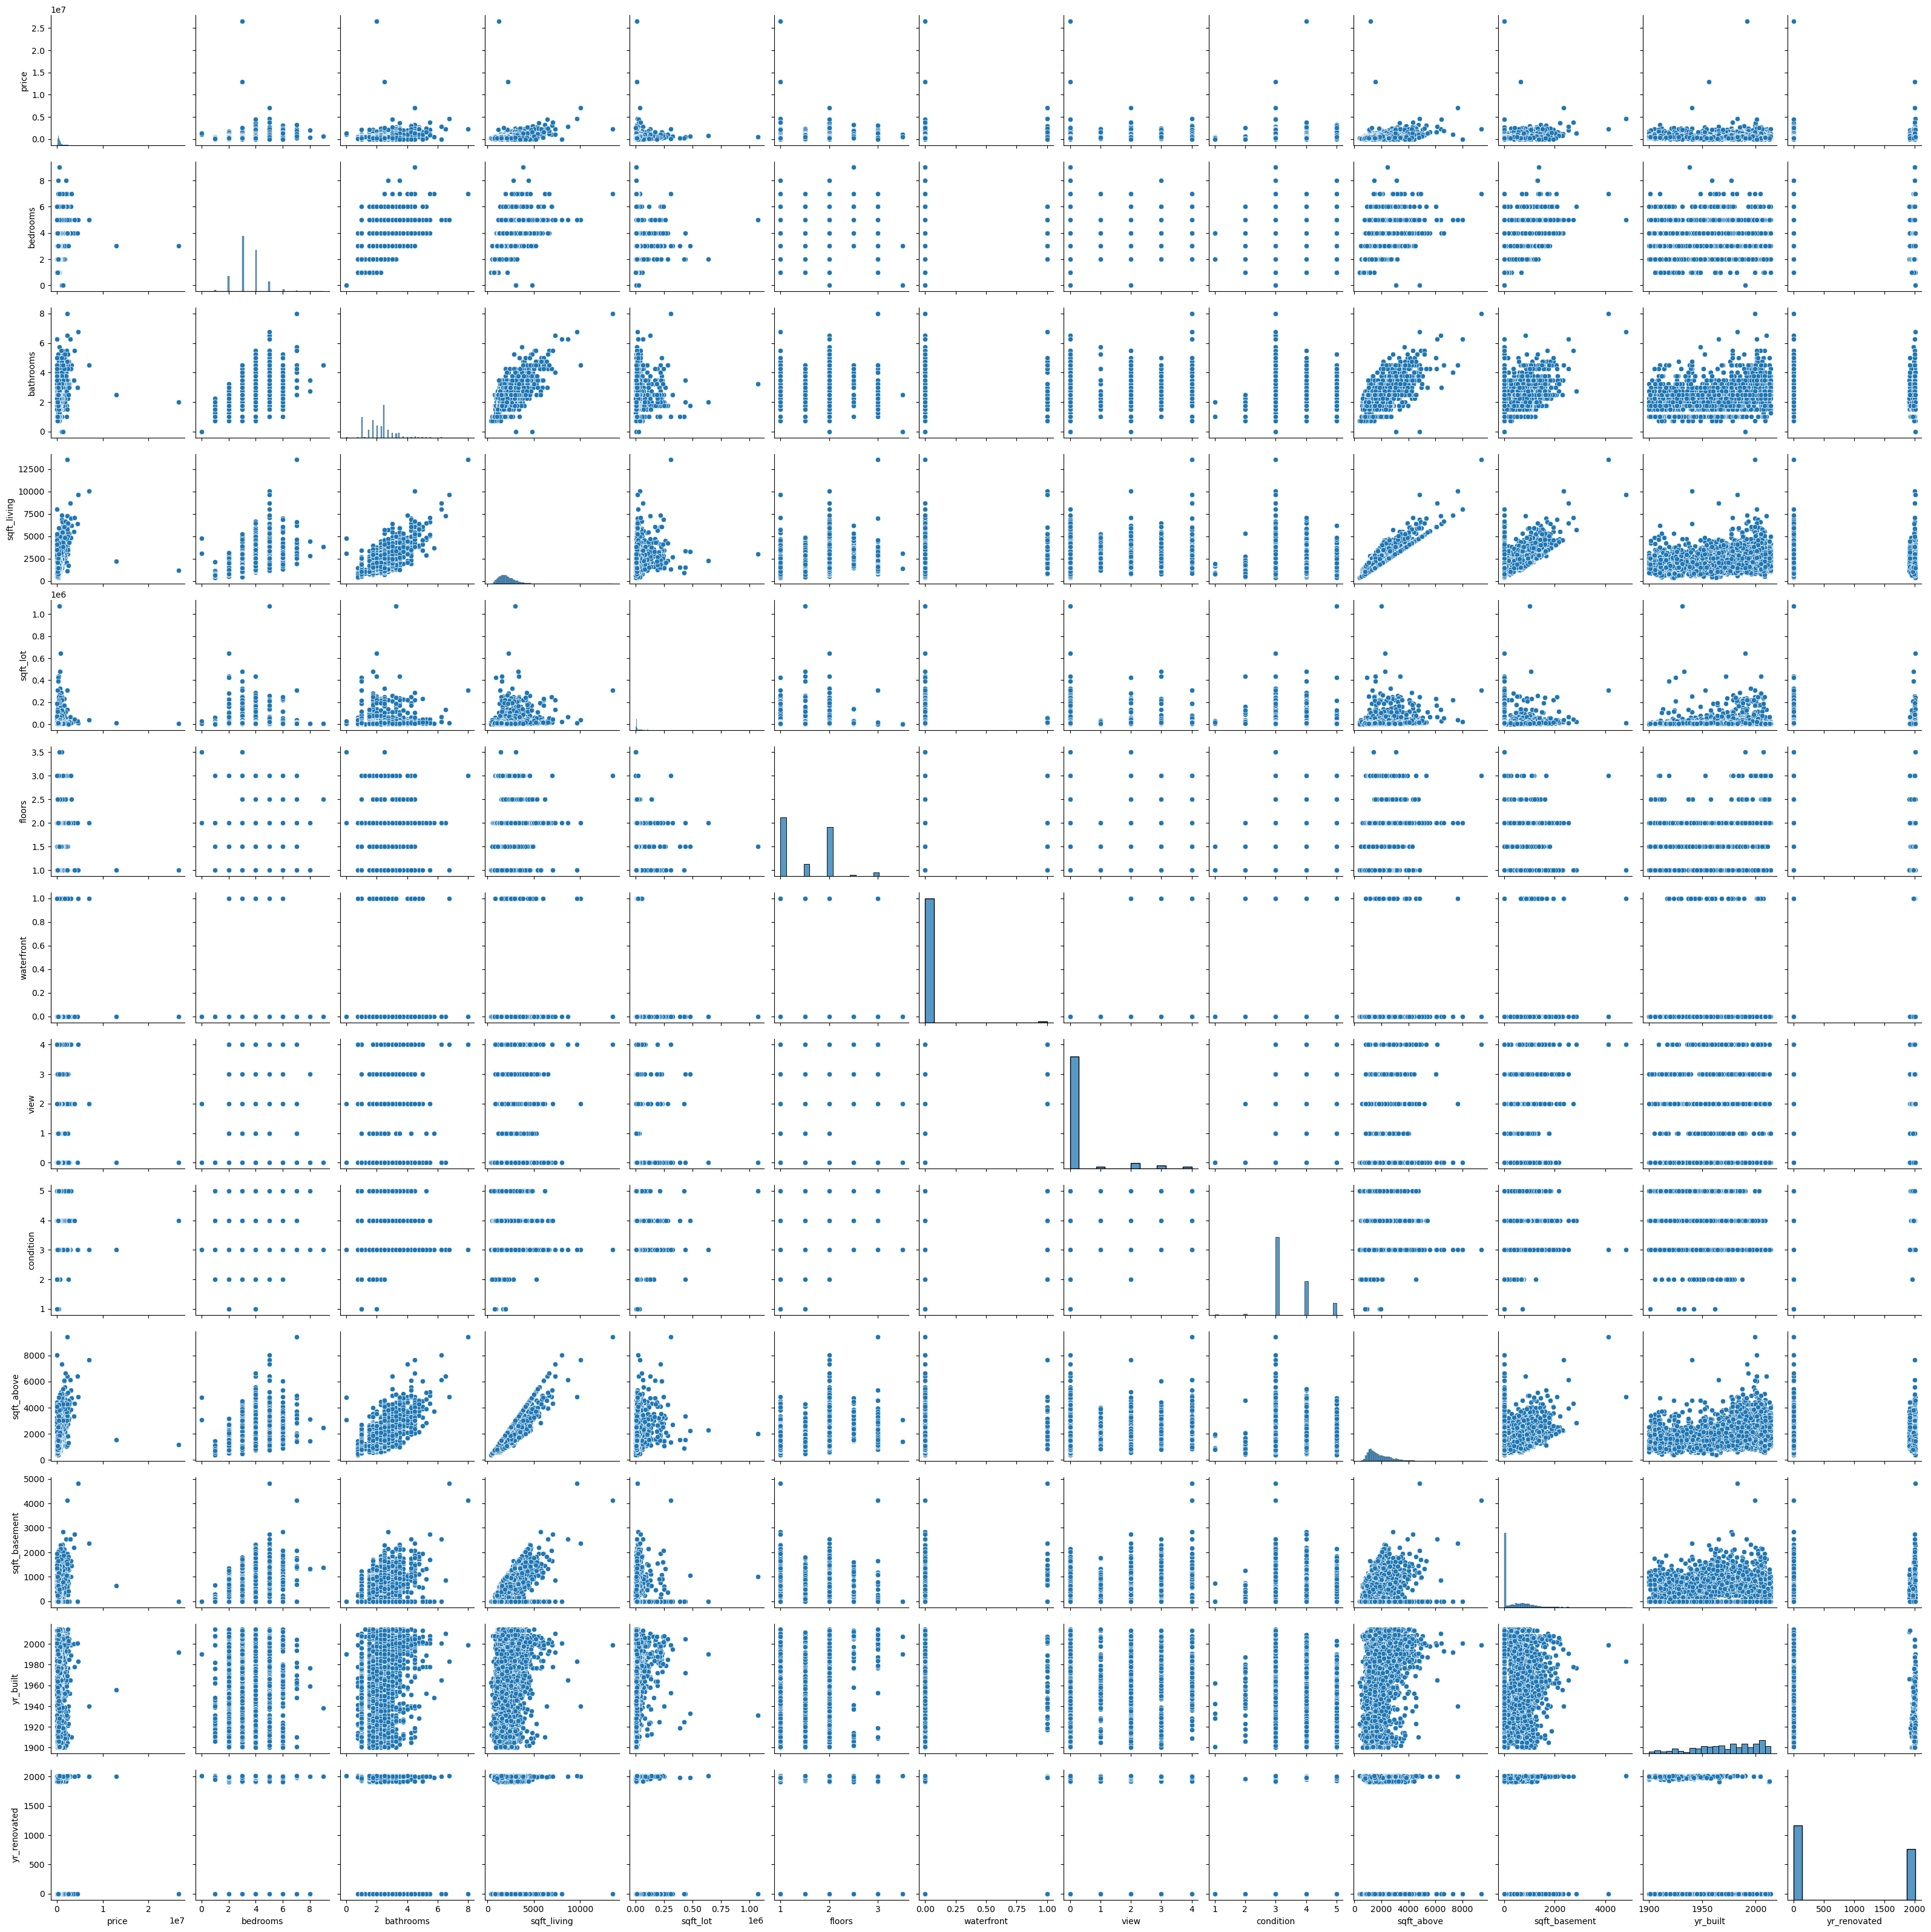

In [45]:
sns.pairplot(df)
plt.show()

In [46]:
df.drop(['date', 'view', 'sqft_above', 'sqft_basement', 'street', 'statezip'], axis=1, inplace=True)

In [47]:
df['city']= pd.factorize(df['city'])[0]
df['country']= pd.factorize(df['country'])[0]

<Axes: >

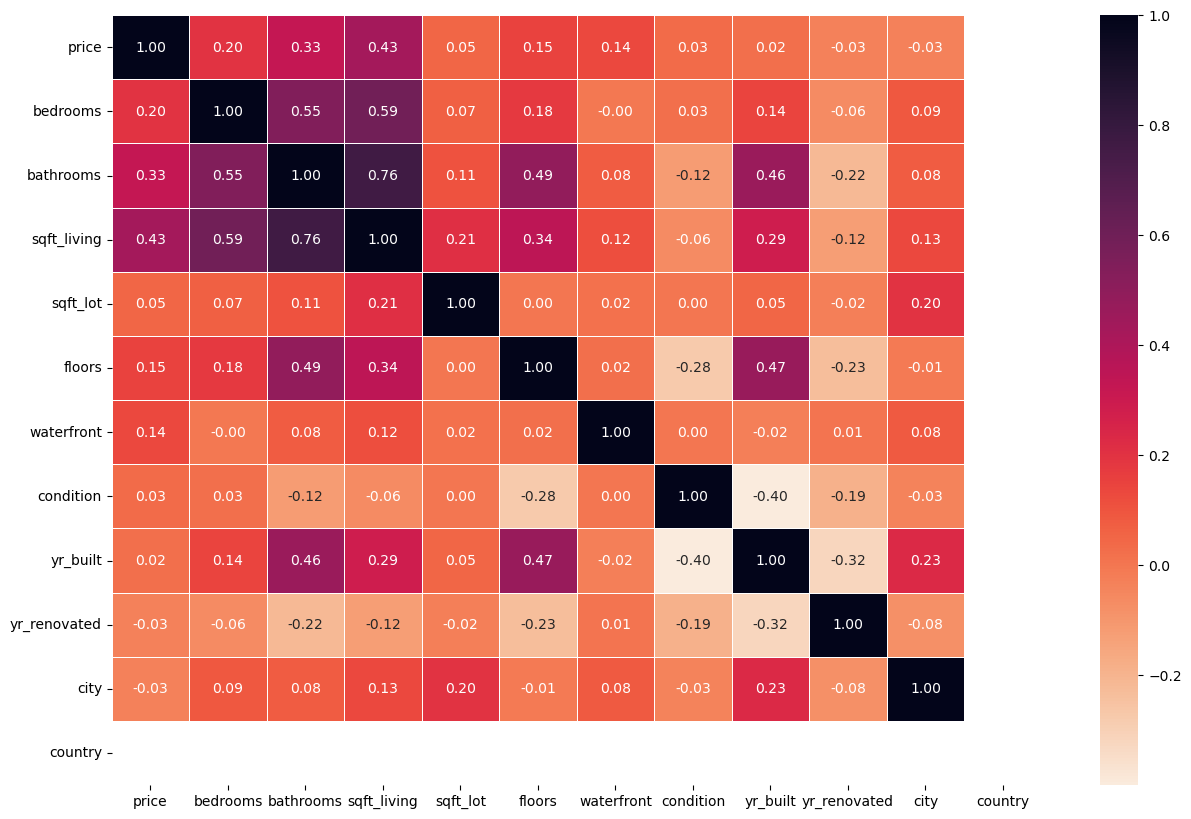

In [48]:
correl = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correl, annot=True, cmap='rocket_r', linewidths=0.5, fmt='.2f')

In [49]:
df.shape

(4600, 12)

In [50]:
df.groupby("city")[["price"]].sum()

price
city              
0     5.170826e+07
1     9.120843e+08
2     8.130610e+07
3     2.422937e+08
4     1.568976e+08
5     3.230159e+07
6     1.997829e+07
7     1.614510e+07
8     1.202106e+08
9     5.268392e+07
10    1.768957e+07
11    1.588758e+07
12    4.290338e+07
13    1.218461e+08
14    1.114826e+08
15    7.009998e+07
16    9.122275e+06
17    7.619500e+06
18    1.104730e+08
19    1.119254e+07
20    3.807768e+07
21    1.696775e+07
22    2.582210e+07
23    1.273791e+07
24    4.250000e+05
25    2.953461e+07
26    2.197954e+07
27    9.664832e+07
28    3.056450e+06
29    3.598500e+06
30    1.454140e+07
31    1.036440e+06
32    6.990000e+05
33    8.940412e+06
34    1.370415e+07
35    4.779350e+06
36    7.113428e+06
37    2.251215e+07
38    8.613208e+06
39    5.250000e+05
40    1.351400e+06
41    7.450000e+05
42    1.124900e+06
43    5.700000e+05

In [51]:
average_price = df['price'].mean()
f"The average price is : {average_price: .2f}"

'The average price is :  551962.99'

In [52]:
max_sale_percentage = df['price'].max()
print(f"The max_sale_percentage is :{max_sale_percentage: .2f}%")

The max_sale_percentage is : 26590000.00%


In [53]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'yr_built', 'yr_renovated', 'city',
       'country'],
      dtype='object')

In [54]:
floor_per_yr_built = df['yr_built'].value_counts()

<Axes: xlabel='city'>

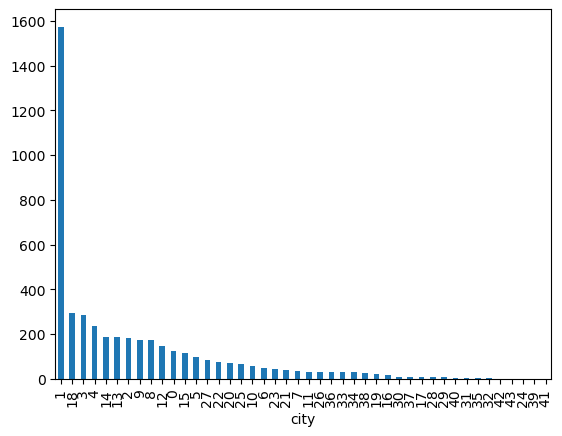

In [55]:
df.city.value_counts().plot(kind = "bar")

<Axes: ylabel='count'>

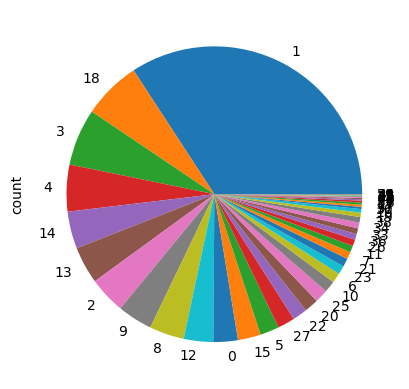

In [59]:
df.city.value_counts().plot(kind = "pie", radius =1 )

In [61]:
import plotly.express as px
top_5_prices = df['price'].head()
fig = px.pie(values=top_5_prices, names=top_5_prices.index, title="Top 5 Prices")
fig.show()